In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rigidbody.kinematics as kine
import rigidbody.plotter as plotter

In [3]:
plotter.set_context("paper")

In [4]:
def kinematic_dynamic(x, nu):
    """
    Kinematic of a two-dimensional movement.
    The state x contains (x,y,phi).

    Parameters
    ----------
    t: float
    x: np.ndarray (3,)

    Returns
    -------
    dx_dt: np.ndarray (3,)
    """
    j_inv = kine.inverse_analytical_jacobian_2d(x[-1])
    return j_inv@nu

In [5]:
x_init = np.array([0.,0.,0.])
N_t = 300
dt = 1e-2
t_span = np.arange(N_t)*dt
x_t = np.zeros((t_span.shape[0],3))
x_t[0] = x_init
v = 10*np.ones_like(t_span)
zeros_portion = np.pi*np.zeros((25,))
ones_portion = np.pi*np.ones((25,))
phi_dot = np.concatenate([ones_portion,ones_portion,zeros_portion,ones_portion,ones_portion,zeros_portion,ones_portion,ones_portion,zeros_portion,ones_portion,ones_portion,zeros_portion])
# phi_dot = np.random.randn(t_span.shape[0])*np.pi
nu_t = np.block([[v],
                 [np.zeros_like(t_span)],
                [phi_dot]])
nu_t = nu_t.T

In [6]:
zeros_portion.shape

(25,)

In [7]:
for i in range(t_span.shape[0]-1):
    x_t[i+1] = x_t[i] + dt* kinematic_dynamic(x_t[i],nu_t[i])

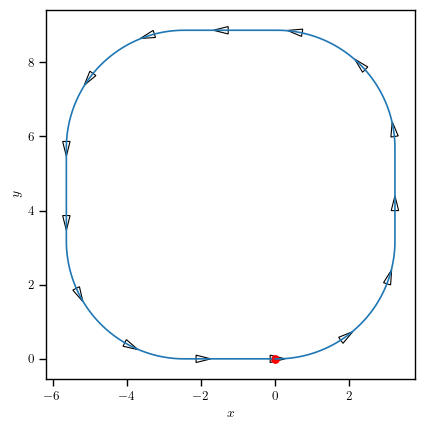

In [15]:
ax = plotter.two_d_trajectory_attitude_plot(x_t,0.10,20,color="black")
ax.set_aspect("equal")
ax.scatter(x_t[0,0],x_t[0,1],s=30,color='red')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.savefig('trajectory.svg')

Text(0.5, 0, '$t$')

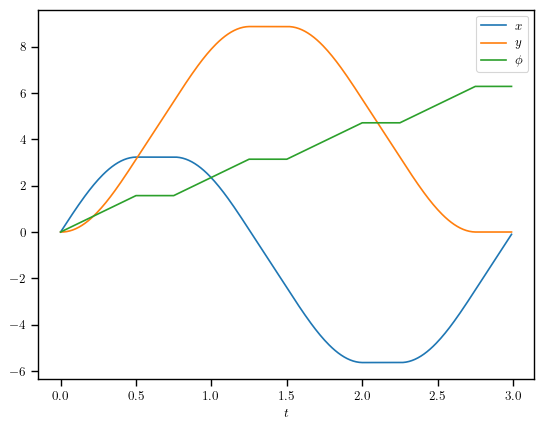

In [14]:
plt.plot(t_span,x_t, label=[r"$x$",r"$y$",r"$\phi$"])
plt.legend()
plt.xlabel(r'$t$')